In [5]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import requests
from bs4 import BeautifulSoup
import itertools
from sympy.ntheory import primefactors
from z3 import *

### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2015/10/Oct15.png" width="600" >

In [2]:
# This manual solution is the best I've found https://math.stackexchange.com/questions/2120002/solve-this-hexagon-puzzle


def hex_print(coord,colors,labels):    
    # Horizontal cartesian coords
    hcoord = [c[0] for c in coord]

    # Vertical cartersian coords
    vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

    givens = [[-1, 4, -3], [-2, 4, -2], [4, 0, -4], [1, 2, -3], [4, -2, -2], [2, -1, -1], [-4, 2, 2], [-3, 0, 3], [-2, -2, 4], [1, -3, 2], [3, -4, 1]]
    
    border = ["k" if x in givens else "k" for x in coord]
    fig, ax = plt.subplots(1,figsize=(10,10))
    ax.set_aspect('equal')
   
    # Add some coloured hexagons
    for x, y, c, l, b in zip(hcoord, vcoord, colors, labels, border):
        color = c[0].lower()  # matplotlib understands lower case words for colours
        hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., facecolor=color,
                         orientation=np.radians(30), alpha=0.2, edgecolor=b)
        
        ax.add_patch(hex)
            # Also add a text label
        ax.text(x, y+0.2, l, ha='center', va='center', size=10)

    # Also add scatter points in hexagon centres
    ax.scatter(hcoord, vcoord, c=[c[0].lower() for c in colors], alpha=0)
    plt.axis("off")
    plt.show()

In [13]:
print(primefactors(121121))
print(7*11*11*11*13)
print(primefactors(3059))
print(7*19*23)


[7, 11, 13]
121121
[7, 19, 23]
3059


Solved in 1.1417 seconds
Sum is: 256,391


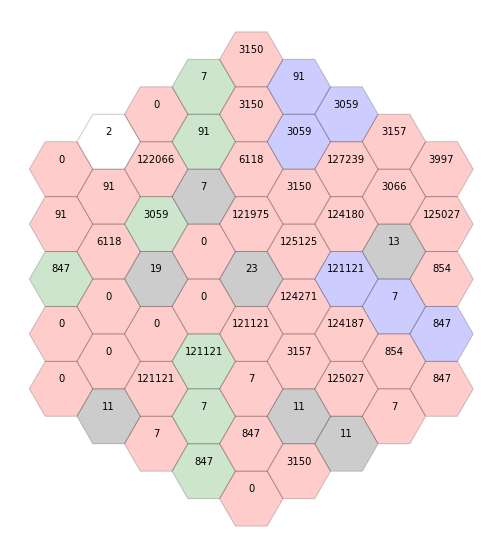

In [3]:
start = time.time()

point = {}
point_colour = {}
cols = ["k","b","r","g","w"]


lab_col= [2,2,3,2,2,
          0,2,2,2,2,4,
          2,2,2,0,3,2,2,
          3,3,3,2,2,0,3,3,
          2,2,2,2,0,2,2,2,2,
          2,0,2,2,2,2,1,1,
          0,2,2,1,2,2,1,
          2,2,1,0,2,2,
          2,1,2,2,2]

x=0

s = Optimize()


#Set up the variables
for i,j,k in itertools.product(range(-4,5),range(-4,5),range(-4,5)):
    if i+j+k !=0:
        continue
    point[(i,j,k)] = Int("x_%s_%s_%s" % (i+5, j+5,k+5))
    point_colour[(i,j,k)] = Int("c_%s_%s_%s" % (i+5, j+5,k+5))
    
    if int(lab_col[x]) in [1,3]:
        s += point_colour[(i,j,k)] == int(lab_col[x])
    else:
        s += point_colour[(i,j,k)] != 1
        s += point_colour[(i,j,k)] != 3
    x += 1

s.maximize(Sum([point[(x,y,z)] for x,y,z in point.keys() if x ==0]))
    
    
# 3059 = 23*19*7
# The only cell with 23 views is the central one so must be black 23

s += point[(0,0,0)] == 23
s += point_colour[(0,0,0)] == 0

# means the other black 19 is here
s += point[(-2,1,1)] == 19
s += point_colour[(-2,1,1)] == 0

#and hence green 3059 is here
s += point[(-2,2,0)] == 3059
s += point_colour[(-2,2,0)] == 3

#and forces black 7 here
s += point[(-1,2,-1)] == 7
s += point_colour[(-1,2,-1)] == 0
    
    
# Fixed points    
s += [point[(i,j,k)] > -1 for (i,j,k) in point.keys()]
s += [And(point_colour[(i,j,k)] >=0,point_colour[(i,j,k)] <5)  for (i,j,k) in point_colour.keys()]

s += point[(-1,4,-3)] == 7
s += point_colour[(-1,4,-3)] == 3

s += point[(-2,4,-2)] == 0
s += point_colour[(-2,4,-2)] == 2

s += point[(4,0,-4)] == 3997
s += point_colour[(4,0,-4)] == 2

s += point[(1,2,-3)] == 3059
s += point_colour[(1,2,-3)] == 1

s += point[(4,-2,-2)] == 854
s += point_colour[(4,-2,-2)] == 2

s += point[(2,-1,-1)] == 121121
s += point_colour[(2,-1,-1)] == 1

s += point[(-4,2,2)] == 847
s += point_colour[(-4,2,2)] == 3

s += point[(-3,0,3)] == 0
s += point_colour[(-3,0,3)] == 2

s += point[(-2,-2,4)] == 7
s += point_colour[(-2,-2,4)] == 2

s += point[(1,-3,2)] == 11
s += point_colour[(1,-3,2)] == 0
  
s += point[(3,-4,1)] == 7
s += point_colour[(3,-4,1)] == 2  
   
    
# constraints

# cols = ["k","b","r","g"]

for i,j,k in point.keys():
    s+= Implies(point_colour[(i,j,k)] == 0,  # black numbers = number of red numbers
               point[(i,j,k)] == Sum(                 
                   [If(point_colour[(x,y,z)] == 2,1,0) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z)) ])) 
  
    
    s+=  Implies(point_colour[(i,j,k)] == 1,  # blue number = max of green numbers 
        Or(point[(i,j,k)] ==0, *[And(point[(i,j,k)] == point[(x,y,z)],point_colour[(x,y,z)] == 3) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z))]))
    
    s+=  [Implies(And(point_colour[(x,y,z)] == 3, point_colour[(i,j,k)] ==1) ,point[(i,j,k)] >= point[(x,y,z)]) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z))]

    
    s+= Implies(point_colour[(i,j,k)] == 2, # red numbers = sum of blue numbers 
               point[(i,j,k)] == Sum(                 
                   [If(point_colour[(x,y,z)] == 1,point[(x,y,z)],0) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z)) ])
               )
    
    s+= Implies(point_colour[(i,j,k)] == 3, #green numbers = product of black numbers
               point[(i,j,k)] == Product(                 
                   [If(point_colour[(x,y,z)] == 0,point[(x,y,z)],1) for x,y,z in point.keys() if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z)) ])
               )
  
if s.check() == sat:
    m = s.model()
    coord= [x for x in point.keys()]    
    color = [cols[m.evaluate(point_colour[x]).as_long()] for x in point_colour.keys()]
    labels = [m.evaluate(point[x]).as_long() for x in point.keys()] 
    answer = np.sum([m.evaluate(point[(i,j,k)]).as_long() for (i,j,k) in point.keys() if i==0])
    stop = time.time()
    print("Solved in {:.4f} seconds".format(stop-start))
    print("Sum is: {:,.0f}".format(answer))
    hex_print(coord,color,labels)

else:
    print("Failed")
   

In [ ]:
url='https://www.janestreet.com/puzzles/solutions/october-2015-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print("Solution")
print("~~~~~~~~")
print(" ".join(x[7:8]))

### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2015/11/hexagony_ans.png" width="400" >

In [ ]:
coord=[]
colors =[]
labels =[]

for i,j,k in itertools.product(range(-4,5),range(-4,5),range(-4,5)):
    if i+j+k !=0:
        continue
    coord.append([i,j,k])
    if i ==3 or j==-1 or k==-2:
        colors.append(["Blue"])
    else:
        colors.append("Red")
    labels.append((i,j,k))


hex_print(coord,colors,labels)

In [6]:
labs = [0,0,847,91,0,
 11,0,0,6118,91,0,
 7,121121,0,19,3059,122066,0,
 847,7,121121,0,0,7,91,7,
 0,847,7,121121,23,121975,6118,3150,3150,
 3150,11,3157,124271,125125,3150,3059,91,
 11,125027,124187,121121,124180,127239,3059,
 7,854,7,13,3066,3157,
 847,847,854,125027,3997]

lab_col= [2,2,3,2,2,0,2,2,2,2,4,2,2,2,0,3,2,2,3,3,3,2,2,0,3,3,2,2,2,2,0,2,2,2,2,2,0,2,2,2,2,1,1,0,2,2,1,2,2,1,2,2,1,0,2,2,2,1,2,2,2]

number in view


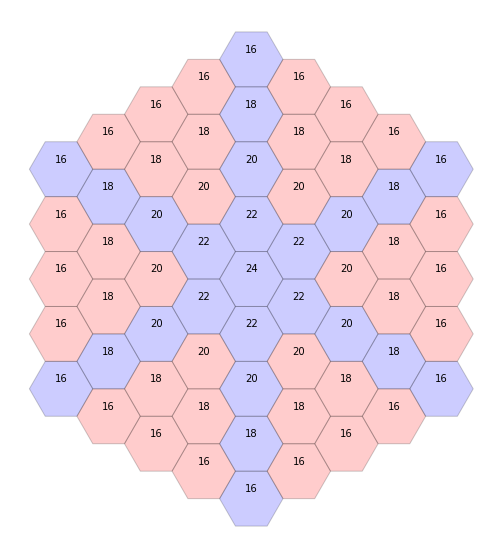

In [4]:
coord=[]
colors =[]
labels =[]

for i,j,k in itertools.product(range(-4,5),range(-4,5),range(-4,5)):
    if i+j+k !=0:
        continue
    coord.append([i,j,k])
    if i ==0 or j==0 or k==-0:
        colors.append(["Blue"])
    else:
        colors.append("Red")

for [i,j,k] in coord:
    labels.append(np.sum([1 for [x,y,z] in coord if (i==x or j==y or k==z) & ((i,j,k) != (x,y,z))]))


print("number in view")   
hex_print(coord,colors,labels)